### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as le
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn import tree

### Import dan Cek Dataset

In [2]:
df_fruit = pd.read_excel('fruit.xlsx')
df_fruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [3]:
print("Data Shape : ",df_fruit.shape)

Data Shape :  (10000, 6)


In [4]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
df_fruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [6]:
df_fruit.isnull().sum()

diameter    0
weight      0
red         0
green       0
blue        0
name        0
dtype: int64

In [7]:
df_fruit['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

In [8]:
encoder = le()
df_fruit['name'] = encoder.fit_transform(df_fruit['name'])
df_fruit['name'].value_counts()

name
1    5000
0    5000
Name: count, dtype: int64

### Train Test Split


In [9]:
x = df_fruit.drop('name', axis=1)
y = df_fruit['name']

In [10]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Modeling,Evaluasi,dan Prediksi

In [12]:
klasifikasi = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=15,random_state=0)
klasifikasi.fit(x_train,y_train)
single_tree = klasifikasi.estimators_[5]

In [13]:
y_pred = klasifikasi.predict(x_test)
CLF = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print("Nilai Akurasi Random Forest : {:.2f}".format(CLF*100))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1237
           1       0.95      0.93      0.94      1263

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

Nilai Akurasi Random Forest : 94.20


### Visualisasi Pohon

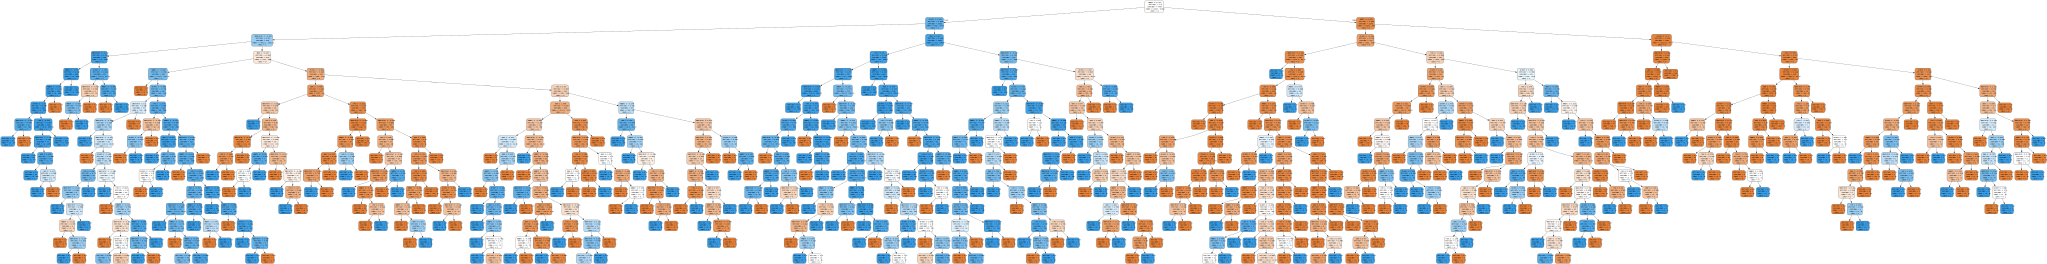

In [14]:
dot_data = tree.export_graphviz(single_tree, out_file=None, feature_names=['diameter', 'weight', 'red', 'green', 'blue'], class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Test Data Baru dan Buat Model

In [15]:
new_fruit = {
    'diameter': [4],
    'weight': [5],
    'red': [9],
    'green': [6],
    'blue': [100]
}

new_fruit = pd.DataFrame(new_fruit)
new_fruit

,diameter,weight,red,green,blue
0,4,5,9,6,100


In [16]:
scaled_new_data = scaler.transform(new_fruit)
y_pred_new = klasifikasi.predict(scaled_new_data)

print("Buah yang di prediksi termasuk jenis :",encoder.inverse_transform(y_pred_new))

Buah yang di prediksi termasuk jenis : ['orange']


In [17]:
import pickle
pickle.dump(klasifikasi, open('RFC_fruit.pkl', 'wb'))